<a href="https://colab.research.google.com/github/rogersirius2023/Atvidades/blob/main/C%C3%B3pia_de_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Clustering (Agrupamento)
Vamos usar o conjunto de dados de cidades para ver se conseguimos os estados em grupos relativamente homogêneos, a fim de direcionar políticas públicas mais específicas e eficazes auxiliando gestores públicos.

Suponha que o governo federal deseja identificar estados que necessitem de maior investimento no combate à pobreza e você foi encarregado de entregar a lista de tais estados.

Para fazer essa análise precisaremos olhar para os dados, mas algumas perguntas podem surgir nesse momento como, por exemplo, "Qual(is) indicador(es) deveremos usar para fazer a classificação dos estados?" e "Qual será a linha de corte usada para a classificação?".

Estas questões, entre outras, podem atrapalhar a eficiência da política pública se forem escolhidas sem base técnica. Por exemplo, poderíamos considerar que precisa de mais investimento todos os estados cujo IDH seja menor que 0.7, esse é um critério possível mas arbitrário. Será que esse seria um bom valor para fazer a classificação? Se for muito baixo, alguns estados que precisam dos recursos acabariam ficando sem, e se for muito alto estaríamos enviando recursos para estados que não precisam, diminuindo a eficiência da política pública.

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Fonte dos Dados.xlsx')
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


In [3]:
pd.pandas.set_option('display.max_columns', None)


In [4]:
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


In [5]:
df.columns

Index(['nomeLocalidade', 'estado', 'População residente',
       'Densidade demográfica', 'Porcentagem de Jovens',
       'Porcentagem de Ativos', 'Porcentagem de Idosos', 'Taxa de Urbanização',
       'Taxa de Saneamento Básico', 'Ativos com Baixo Nível Educacional',
       'Ativos com Médio Nível Educacional',
       'Ativos com Alto Nível Educacional',
       'Percentual de estrangeiros ao total de Trabalhadores', 'PIB Municipal',
       'Estudantes Ensino primário', 'Estudantes Ensino secundário',
       'Estudantes Ensino superior',
       'Óbitos até 1 ano de idade por milhares de habitantes',
       'Óbitos por milhares de habitantes',
       'Nascidos por milhares de habitantes',
       'Hospitais por milhares de habitantes',
       'Médicos por milhares de habitantes', '% de pobres', 'IDH',
       'Percentual de trabalhadores especializados',
       'Valores de Importação por 10,000 habitantes',
       'Valores de Exportação por 10,000 habitantes',
       'Número de hotéis por

In [6]:
df2 = df [['estado','PIB Municipal','% de pobres','IDH','Média Salarial','Taxa de desemprego']]
df2 = df2.groupby(by='estado').mean().reset_index()
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556


Padronizando os Dados
Como os dados de diferentes variáveis estão em diferentes escalas, é necessário padronizar as variáveis de forma que todos contribuam igualmente nos cálculos de distâncias que serão feitos.

Para fazer a padronização vamos usar a função StandardScaler() do scikit-learn

In [7]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

df_scaled  = df2.copy()

df_scaled.drop('estado', inplace=True, axis=1)

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled['estado'] = df2['estado']

df_scaled.head()



,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos,estado
0,-0.206834,0.924792,-0.702782,-0.328065,-0.606967,-0.894427,Acre
1,-0.211010,1.085804,-1.465417,-0.522383,0.934667,-0.894427,Alagoas
2,-0.201835,0.662013,-0.246939,0.739250,2.380215,-0.894427,Amapá
3,-0.184676,1.530288,-0.738884,3.711683,0.220312,-0.894427,Amazonas
4,-0.207178,0.647259,-0.899338,-0.555597,1.169514,-0.894427,Bahia


In [9]:
df_scaler.columns

Index(['PIB Municipal', '% de pobres', 'IDH', 'Média Salarial',
       'Taxa de desemprego', 'estado'],
      dtype='object')

Taxa de desemprego x % de pobres
Suspeitamos que as variáveis Taxa de desemprego e % de pobres deve ter grande influência na identificação de estados que precisem de uma melhor política de combate à pobreza.

Para enxergar alguma relação nos dados, vamos fazer um gráfico de dispersão (scatterplot) usando a biblioteca seaborn

In [10]:
import seaborn as sns



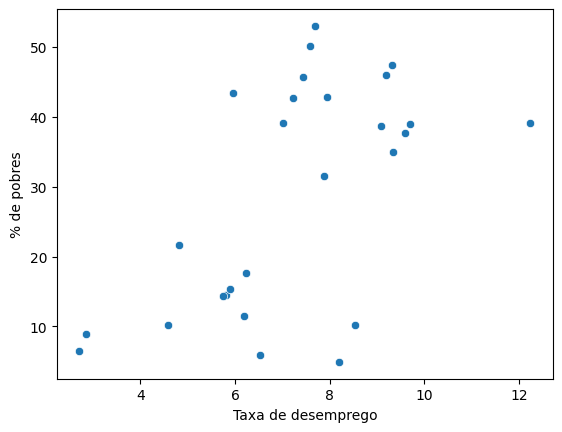

In [11]:
sns.scatterplot(data=df2, x='Taxa de desemprego',y='% de pobres');

Analisando este gráfico, parece haver uma divisão natural em dois grupos. Observe que estados com percentual de pobres menor que 20 possuem taxa de desemprego que vai de 3 a 8, aproximadamente, enquanto que estados com percentual de pobres maior que 30 possuem taxa de desemprego variando de 6 a 12, aproximadamente.

Parece haver uma correlação entre as variáveis, mesmo que não muito forte.

In [12]:
df2[['Taxa de desemprego','% de pobres']].corr()

,Taxa de desemprego,% de pobres
Taxa de desemprego,1.000000,0.583135
% de pobres,0.583135,1.000000


Poderíamos usar apenas a variável % de pobres para criar a classificação, mas perceba que é interessante usar as duas variáveis, pois podemos assim obter não apenas os estados que mais precisam dos recursos como também indicadores de que áreas deveriam receber os recursos a fim de orientar as políticas públicas como, por exemplo, programas voltados à facilitação ao emprego.

O gráfico sugere que poderíamos usar essa duas variáveis para agrupar os estados e uma maneira de fazer isso é com o KMeans.

Usaremos a função KMeans da biblioteca scikit-learn

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(df_scaler[['Taxa de desemprego','% de pobres']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [39]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0], dtype=int32)

In [40]:
df2['grupos'] = kmeans.labels_.tolist()
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,0
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,0
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,0
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,0
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,0


Agora, podemos visualizar novamente os dados considerando o agrupamento encontrado pelo KMeans.

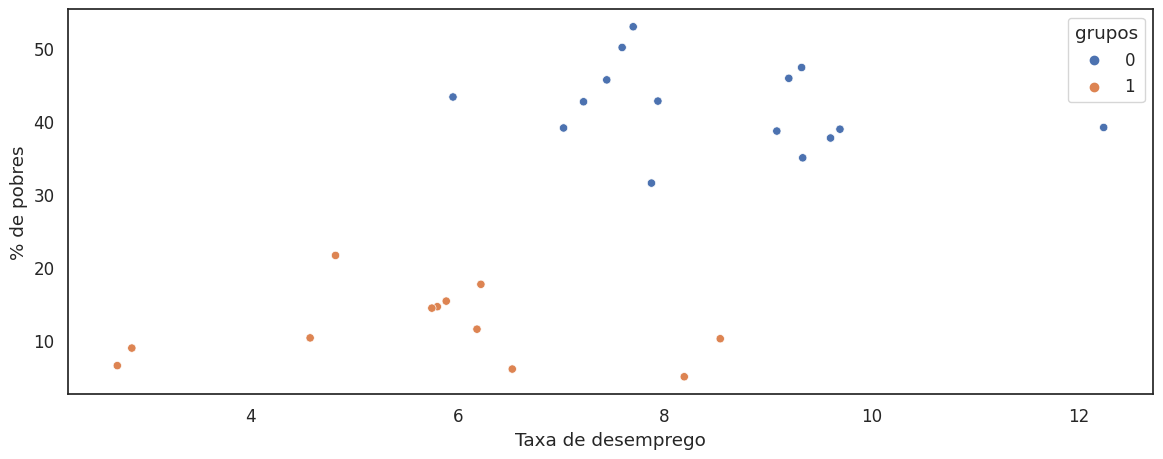

In [41]:
sns.scatterplot(data=df2, x='Taxa de desemprego',y='% de pobres',hue ='grupos');

Podemos ver que os grupos encontrados pelo KMeans coincidem com nossa intuição (o que é um bom sinal) mas agora temos uma maneira técnica de justificar nossa classificação.

Observe que o KMeans separou em dois grupos 0 e 1, mas não nos diz qual grupo precisa de mais investimento, essa tarefa é nossa. O algoritmo só conseguiu agrupar os dados similares mas não sabe o que eles significam.

Podemos ainda modificar um pouco nosso gráfico a fim de saber qual ponto representa cada estado.

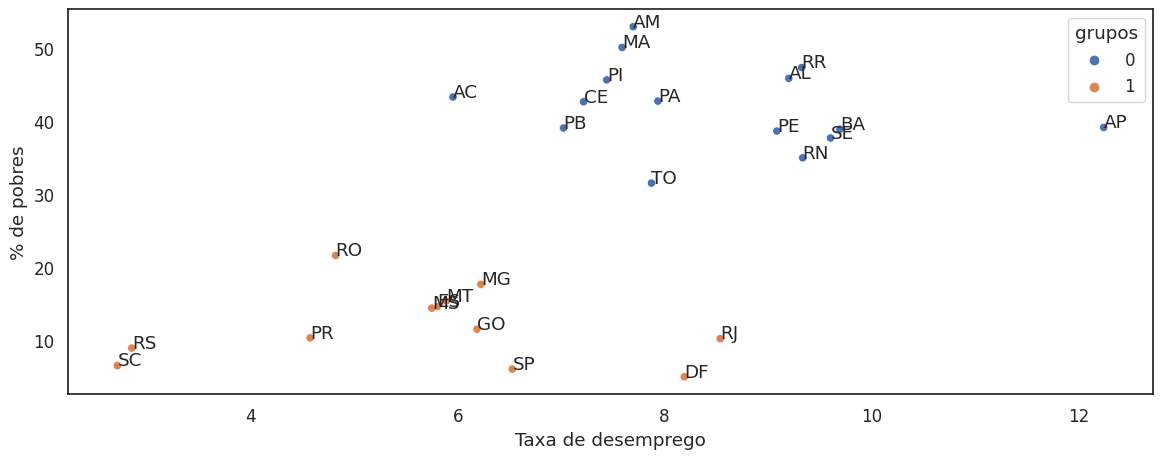

In [42]:
sns.scatterplot(data=df2, x='Taxa de desemprego',y='% de pobres',hue ='grupos');

import matplotlib.pyplot as plt 


desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados= ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR',
'SC',	'SE','SP','TO']

for i, estado in enumerate(estados):
  plt.annotate(estados[i],(desemp[i],pobres[i]))




Se precisássemos usar o algoritmo para classificar novos dados, bastaria usar a sintaxe da forma kmeans.predict(novos_dados)

Na classificação acima nós usamos apenas as variáveis Taxa de desemprego e % de pobres, mas poderíamos usar outro par de variáveis. Se fizermos isso, será que obteremos o mesmo agrupamento?

Encontrando o Melhor k
Nos exemplos acima estavámos interessados em obter dois grupos, mas como devemos proceder quando não soubermos a quantidade natural de grupos que devemos procurar? Nestes casos existem métodos que nos ajudam a encontrar o melhor valor de k.

Método de Cotovelo (Elbow Method)
Neste método, a ideia é rodar o KMeans para várias quantidades diferentes de clusters (k) e tentar encontrar um número ótimo de clusters. Quando aumentamos muito a quantidade de clusters no KMeans, as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando.

Com o Método de Cotovelo, utilizaremos a métrica da Soma dos Quadrados Intra-Clusters (WCSS / Inércia), que é a soma das distâncias entre os objetos e o centróides (centros do agrupamento), isso nos dá uma ideia de similaridade e, portanto, nos ajuda a encontrar um valor adequado para k.

In [45]:
df_scaled[['Taxa de desemprego','% de pobres']].corr()

,Taxa de desemprego,% de pobres
Taxa de desemprego,1.000000,0.583135
% de pobres,0.583135,1.000000


In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [48]:
kmeans.fit(df_scaled[['Taxa de desemprego', '% de pobres']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [49]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0], dtype=int32)

In [50]:
df2['grupos'] = kmeans.labels_.tolist()
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,0
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,0
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,0
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,0
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,0


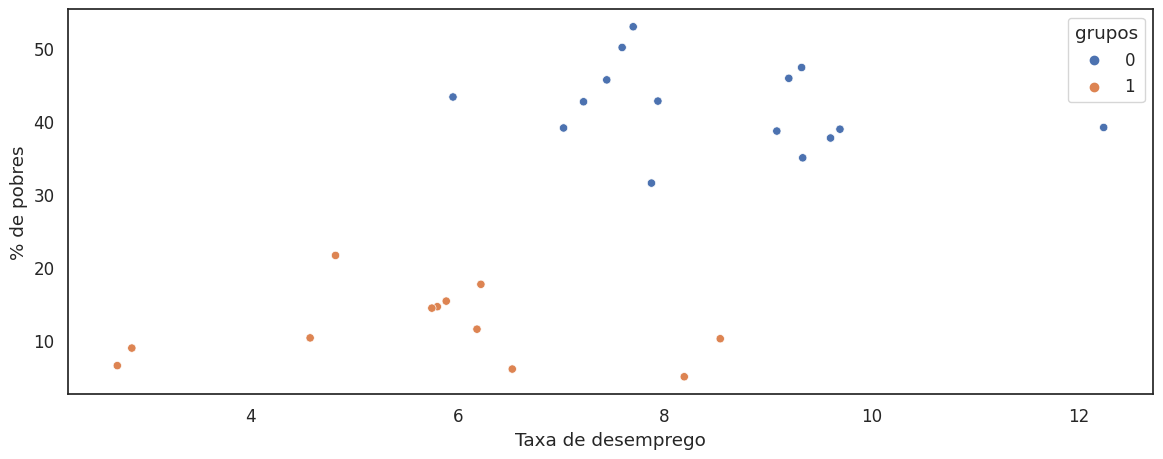

In [51]:
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres', hue='grupos');

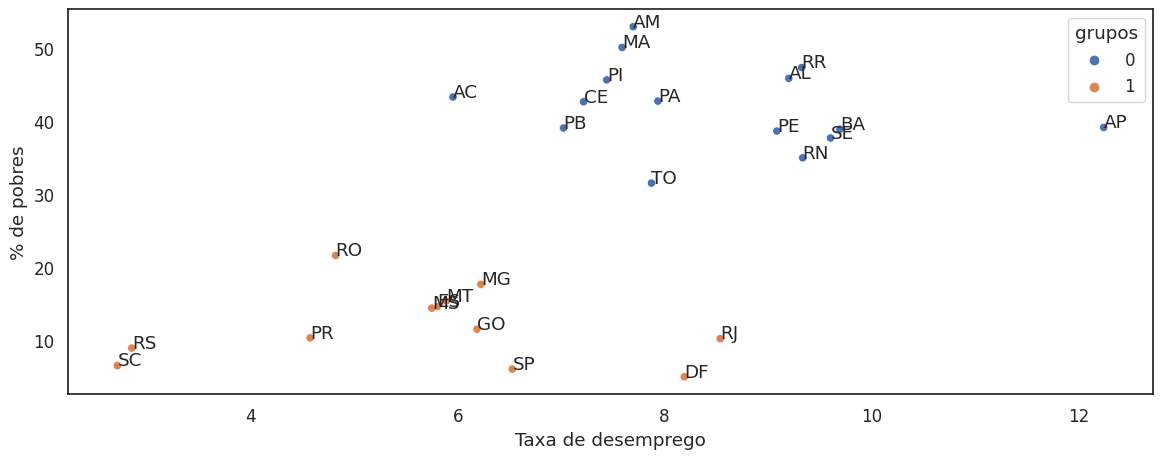

In [54]:
# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres', hue='grupos');

# criando listas que serviram de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

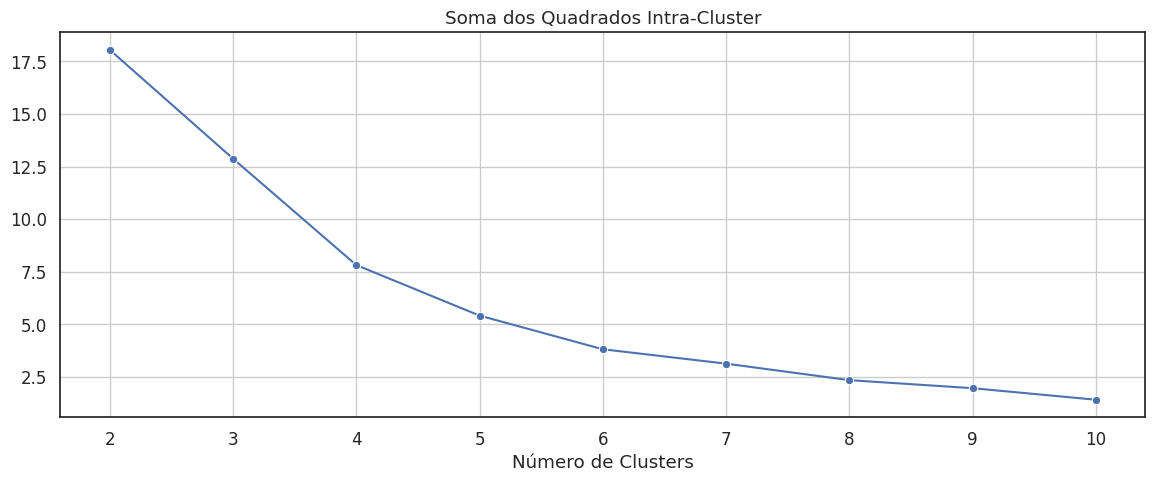

In [57]:
sns.set(style='white',font_scale=1.1, rc ={'figure.figsize':(14,5)})

inercia = []
k_min = 2
k_max = 10

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['Taxa de desemprego','% de pobres']])
    inercia.append(kmeans.inertia_)

sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True);

In [58]:
def numero_otimo_clusters(k_min, k_max):
    from sklearn.cluster import KMeans
    import math
    inercia = []

    for i in range(k_min,k_max+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df_scaled[['Taxa de desemprego','% de pobres']])
        inercia.append(kmeans.inertia_)
    
    x0, y0 = k_min, inercia[0]
    x1, y1 = k_max, inercia[len(inercia)-1]

    distancias = []
    for i in range(len(inercia)):
        x = i+k_min
        y = inercia[i]
        numerador = abs( (y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0 )
        denominador = math.sqrt( (y1 - y0)**2 + (x1 - x0)**2 )
        distancias.append(numerador/denominador)
    return distancias.index(max(distancias)) + 2

# calculando a quantidade ótima de clusters
k_otimo = numero_otimo_clusters(2,10)

print('Número otimizado de clusters: ' + str(k_otimo))

Número otimizado de clusters: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

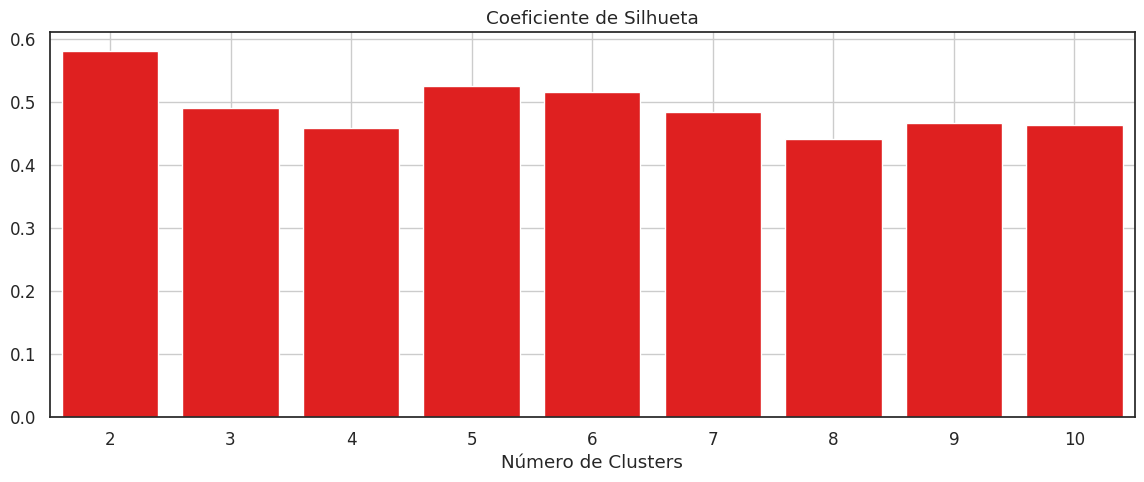

In [59]:
from sklearn.metrics import silhouette_score

silhueta = []
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['Taxa de desemprego','% de pobres']])
    silhueta.append(silhouette_score(df_scaled[['Taxa de desemprego','% de pobres']],
                                     kmeans.labels_,
                                     metric='euclidean'))

sns.barplot(x=n, y=silhueta, color='red')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

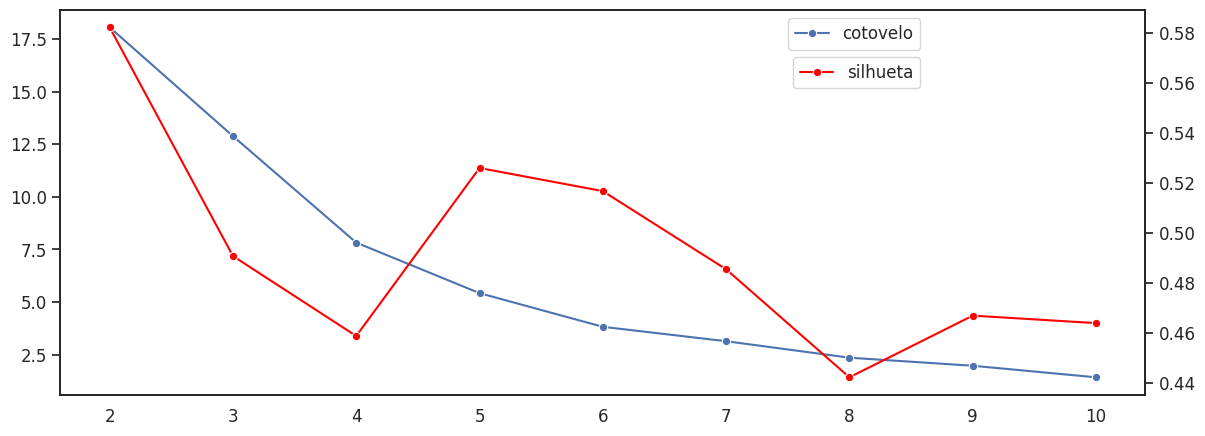

In [60]:
fig, ax = plt.subplots()
sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.legend(labels=["cotovelo"], bbox_to_anchor=(0.8, 1), loc='upper right')
ax2 = ax.twinx()
sns.lineplot(x=range(k_min,k_max+1), y=silhueta, marker='o', color='red')
plt.legend(labels=["silhueta"], bbox_to_anchor=(0.8, 0.9), loc='upper right');

In [61]:
# instanciando o algoritmo
kmeans = KMeans(n_clusters=3, random_state=42)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled[['Taxa de desemprego', '% de pobres']])

# criando a coluna 'grupo'
df2['grupos'] = kmeans.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


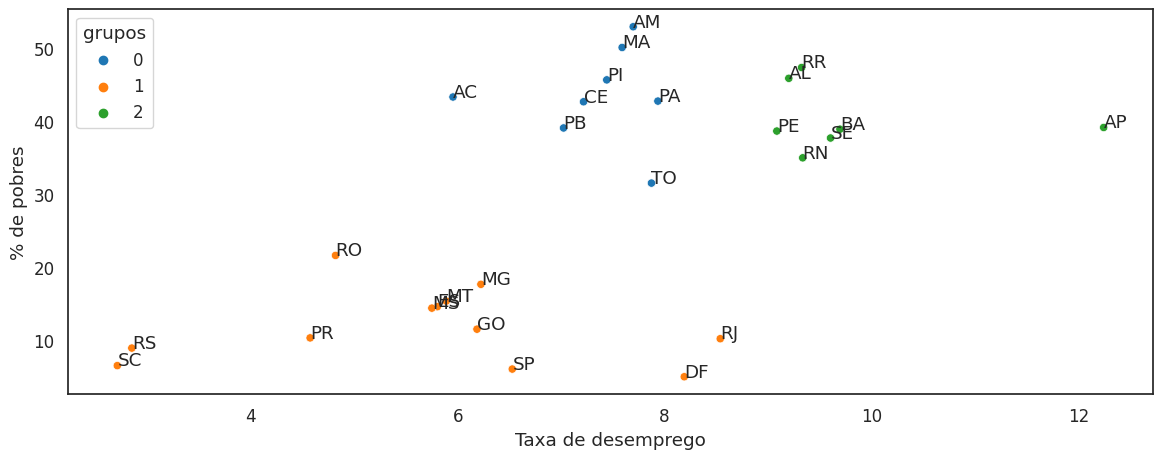

In [62]:
# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue='grupos', palette='tab10');

# criando listas que servirão de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]));

In [63]:
# instanciando o algoritmo
kmeans = KMeans(n_clusters=4, random_state=42)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled[['Taxa de desemprego', '% de pobres']])

# criando a coluna 'grupo'
df2['grupos'] = kmeans.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


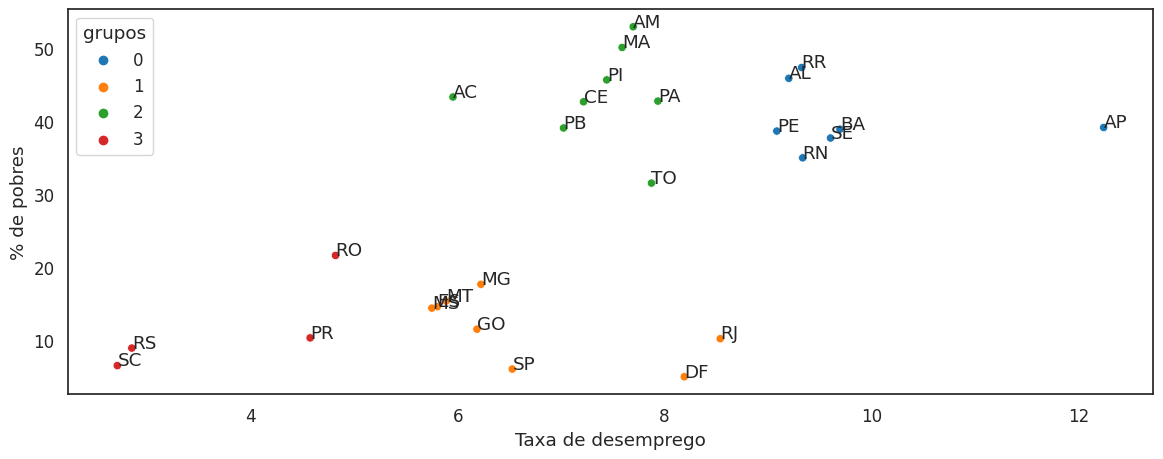

In [64]:
# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue='grupos', palette='tab10');

# criando listas que servirão de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );

In [65]:
# instanciando o algoritmo
kmeans = KMeans(n_clusters=6, random_state=42)

# aplicando o algoritmo aos dados 
kmeans.fit(df_scaled[['Taxa de desemprego', '% de pobres']])

# criando a coluna 'grupo'
df2['grupos'] = kmeans.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


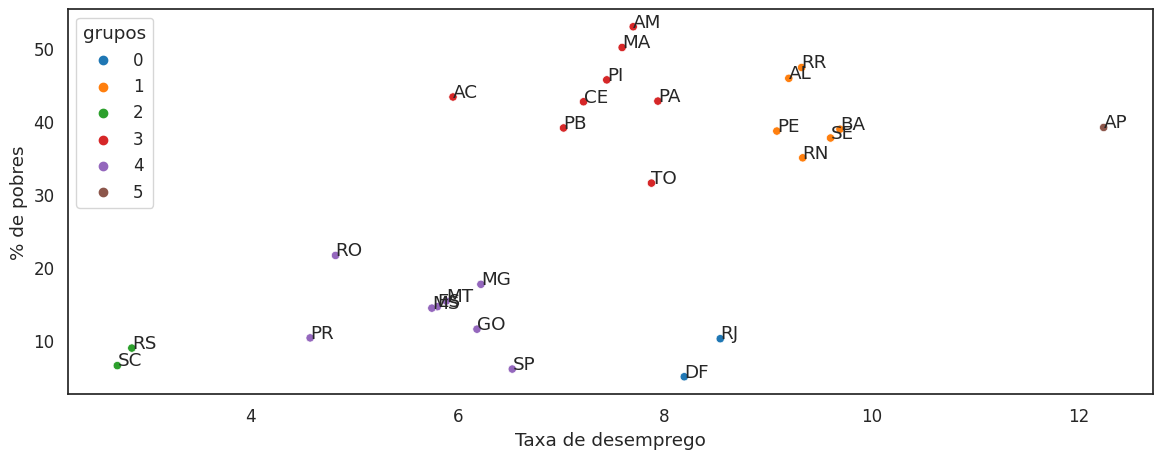

In [66]:
# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue='grupos', palette='tab10');

# criando listas que servirão de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );